In [1]:
import pandas.api.types as ptypes
import pandas as pd
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt


In [2]:
# read file
df_original=pd.read_csv("weatherHistory.csv")

df =df_original
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [3]:
df.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [4]:
df.drop(['Formatted Date', 'Summary','Precip Type','Loud Cover','Daily Summary'], axis=1,inplace=True)

In [5]:
df.dtypes

Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)      float64
Visibility (km)             float64
Pressure (millibars)        float64
dtype: object

In [6]:
df.rename(columns={'Apparent Temperature (C)':'y','Temperature (C)':'x1','Humidity':'x2','Wind Speed (km/h)':'x3','Wind Bearing (degrees)':'x4','Visibility (km)':'x5','Pressure (millibars)':'x6'},inplace=True)
df.head()

,x1,y,x2,x3,x4,x5,x6
0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 7 columns):
x1    96453 non-null float64
y     96453 non-null float64
x2    96453 non-null float64
x3    96453 non-null float64
x4    96453 non-null float64
x5    96453 non-null float64
x6    96453 non-null float64
dtypes: float64(7)
memory usage: 5.2 MB


In [8]:
df.replace(0.0, df.median(), inplace=True)

In [9]:
df.min()

x1    -21.822222
y     -27.716667
x2      0.120000
x3      0.032200
x4      1.000000
x5      0.016100
x6    973.780000
dtype: float64

In [10]:
df.duplicated().sum()

73

In [11]:
df.drop_duplicates(keep=False,inplace=True) 
df.duplicated().sum()
# df.describe()

0

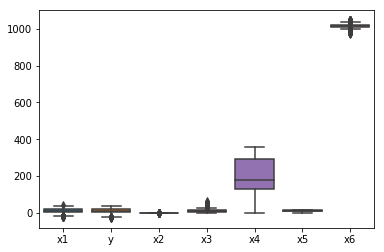

In [12]:
def Handling_missing_data(dataset):
    dataset.replace(np.NaN, dataset.mean(), inplace=True)
    return dataset

dataset=Handling_missing_data(df)
sb.boxplot(data=dataset)

(96307, 7)

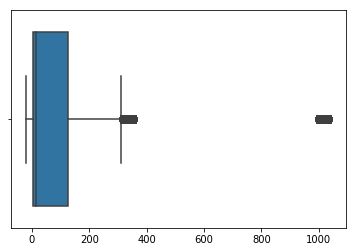

In [13]:
# def remove_outlier(df):
#     low = .05
#     high = .95
#     quant_df = df.quantile([low, high])
#     for name in list(df.columns):
#         if ptypes.is_numeric_dtype(df[name]):
#             df = df[(df[name] > quant_df.loc[low, name]) & (df[name] < quant_df.loc[high, name])]
#     return df
def remove_outlier(df):
    df = df[np.abs(df - df.mean()) <= (3 * df.std())]
    sb.boxplot(df)
remove_outlier(df)
df.shape

In [14]:
# df= remove_outlier(df)
# sb.boxplot(data=df)
# df.shape

In [15]:
# def Split(data):
#     train_set=0.70*len(data)
#     train=int(train_set)
# #         print(train)
#     test_set=0.30*len(data)
#     test=int(test_set)
        
#     return train,test

In [16]:
# train,test = Split(df)

In [17]:
# train_data=df.head(train)
# test_data=df.tail(test)

In [18]:
def Feature_Scaling(df):
        for column in df.columns:
            df[column] = ((df[column] - df[column].min()) /
                             (df[column].max() - df[column].min()))
        return df

In [19]:
df = Feature_Scaling(df)

In [20]:
def Split(data):
    train_set=0.70*len(data)
    train=int(train_set)
#         print(train)
    test_set=0.30*len(data)
    test=int(test_set)
        
    return train,test

In [21]:
 train,test = Split(df)

In [22]:
train_data=df.head(train)
test_data=df.tail(test)

In [23]:
test_data.head()

,x1,y,x2,x3,x4,x5,x6
67561,0.570066,0.612625,0.943182,0.213673,0.421788,0.522523,0.517906
67562,0.561336,0.604590,0.988636,0.172805,0.444134,0.390390,0.508815
67563,0.560526,0.603844,0.988636,0.174319,0.421788,0.390390,0.499587
67564,0.560256,0.603595,0.988636,0.161958,0.413408,0.476476,0.492700
67565,0.560166,0.603513,1.000000,0.124622,0.472067,0.699700,0.487466


In [24]:
df.tail()

,x1,y,x2,x3,x4,x5,x6
96448,0.774998,0.801259,0.352273,0.171796,0.083799,1.000000,0.558953
96449,0.751778,0.779886,0.409091,0.157669,0.053073,0.965966,0.569972
96450,0.710557,0.741944,0.500000,0.140262,0.081006,1.000000,0.576860
96451,0.702187,0.734239,0.545455,0.164480,0.053073,1.000000,0.580854
96452,0.684637,0.718085,0.556818,0.091574,0.106145,0.963964,0.583747


In [25]:
# Separating the output and the parameters data frame
def separate(df):
    output = df.y
    return df.drop('y', axis=1), output

train_data_x,train_data_y = separate(train_data)

In [26]:
test_data_x,test_data_y=separate(test_data)

In [27]:
test_data_x.tail()

,x1,x2,x3,x4,x5,x6
96448,0.774998,0.352273,0.171796,0.083799,1.000000,0.558953
96449,0.751778,0.409091,0.157669,0.053073,0.965966,0.569972
96450,0.710557,0.500000,0.140262,0.081006,1.000000,0.576860
96451,0.702187,0.545455,0.164480,0.053073,1.000000,0.580854
96452,0.684637,0.556818,0.091574,0.106145,0.963964,0.583747


In [28]:
df.describe()

,x1,y,x2,x3,x4,x5,x6
count,96307.000000,96307.000000,96307.000000,96307.000000,96307.000000,96307.000000,96307.000000
mean,0.547611,0.575402,0.698755,0.171106,0.532757,0.645608,0.592641
std,0.154197,0.159352,0.221750,0.106510,0.288781,0.256659,0.106464
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.432184,0.448513,0.545455,0.095358,0.354749,0.527027,0.529063
50%,0.548105,0.592412,0.750000,0.155903,0.500000,0.623624,0.587741
75%,0.658717,0.694226,0.875000,0.220989,0.807263,0.919920,0.651653
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
class MultiLinear_Regression:
    def __init__(self):
        # loads csv file
        self.alpha = 0.1
        self.epoch = 60000
        
    def Gradient_Descent(self, train_x_data, train_y_data,theta_vector):
        
        for length in range(self.epoch):
            hypo=np.dot(theta_vector.T,train_x_data.T)
            diff=np.subtract(hypo,train_y_data.T)
            temp=np.dot(diff,train_x_data)
            temp=np.divide(np.dot(self.alpha,temp),len(train_x_data))
            theta_vector=np.subtract(theta_vector,temp.T)
       
        return theta_vector

    def Test_data(self, test_x_data, theta_vector):
        
        y_predict = np.dot(theta_vector.T,test_x_data.T)
        y_predict=y_predict.T
        return y_predict
    
    def accuracy(self, y_test_data, y_predict):
        total_error = 0
        for i in range(0, len(y_test_data)):
            total_error += abs((y_predict[i] - y_test_data[i]) / y_test_data[i])
        total_error = (total_error / len(y_test_data))
        accuracy = 1 - total_error
        return accuracy * 100


def main(train_data_x,train_data_y,test_data_x,test_data_y):
    obj = MultiLinear_Regression()
    # calling method by class object
    list1 = []
    
    x_train_data = np.array(train_data_x)
    y_train_data = np.array(train_data_y)
    
    x_test_data = np.array(test_data_x)
    y_test_data = np.array(test_data_y)
     
    x_train_data = np.column_stack((np.ones((x_train_data.shape[0], 1)), x_train_data))
    
    x_test_data = np.column_stack((np.ones((x_test_data.shape[0], 1)), x_test_data))
     
    x_size = 6
    theta_vector = np.full((x_size+1,1),.1)
     
    theta_vector = obj.Gradient_Descent(x_train_data, y_train_data,theta_vector)
    y_predict = obj.Test_data(x_test_data, theta_vector)
    
    acc = obj.accuracy(y_test_data, y_predict)
    print("accuracy is", acc)

if __name__ == '__main__':
    main(train_data_x,train_data_y,test_data_x,test_data_y)
    

accuracy is [97.66574938]
